# 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('../data/전처리완료.csv', encoding='CP949')
df.shape

C:\Users\samsung\AppData\Local\Temp\ipykernel_23056\1378581075.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/전처리완료.csv', encoding='CP949')


(186025, 47)

# 기본 EDA

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

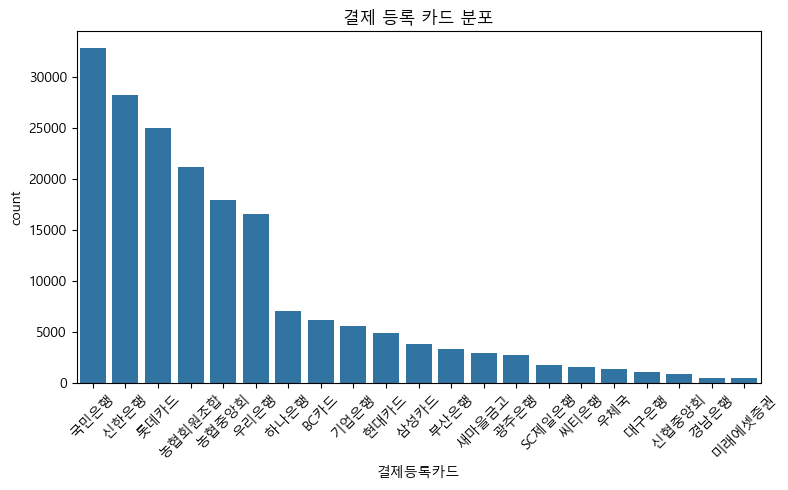

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='결제등록카드', order=df['결제등록카드'].value_counts().index)
plt.title('결제 등록 카드 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

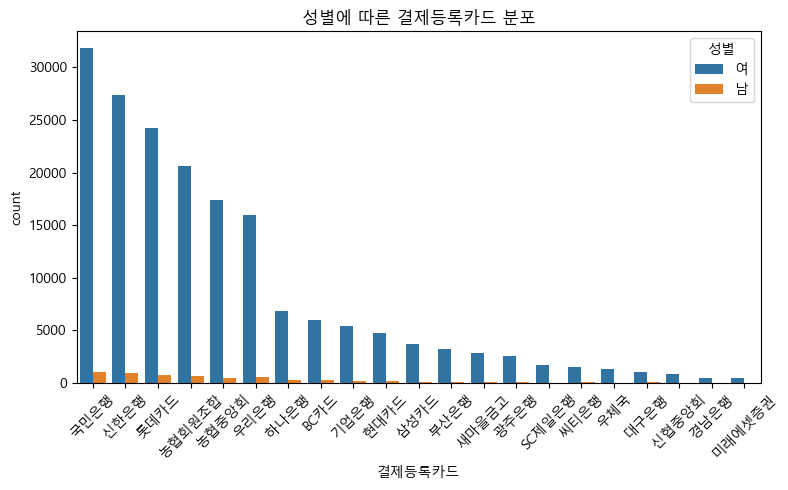

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='결제등록카드', hue='성별', order=df['결제등록카드'].value_counts().index)
plt.title('성별에 따른 결제등록카드 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

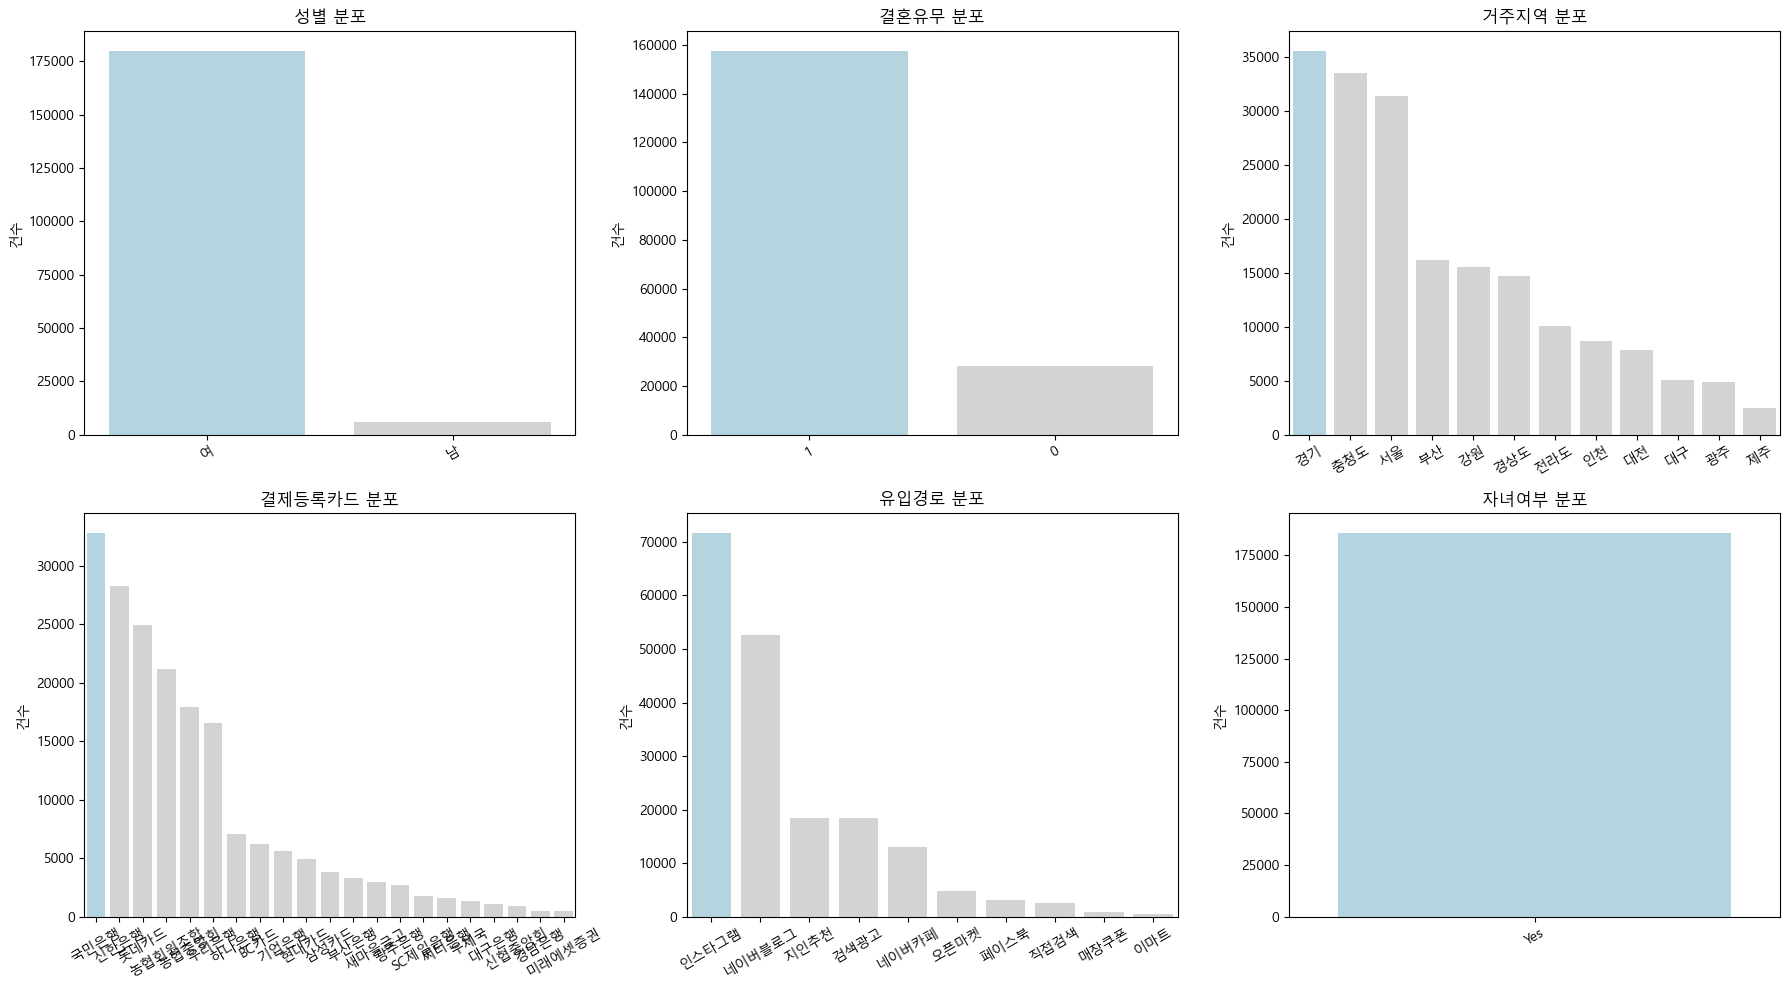

In [34]:
cat_cols = ['성별', '결혼유무', '거주지역', '결제등록카드', '유입경로', '자녀여부']

plt.figure(figsize=(18, 10))  # 전체 크기 조정

for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)

    # 값 개수 기준 정렬
    order = df[col].value_counts().index
    top_value = order[0]

    # 색상 매핑: 최빈값만 lightblue, 나머지는 lightgray
    color_map = {val: ('lightblue' if val == top_value else 'lightgray') for val in order}

    # hue를 col로 지정하고 legend=False로 제거
    sns.countplot(
        x=col,
        hue=col,
        data=df,
        order=order,
        palette=color_map,
        legend=False
    )

    plt.title(f'{col} 분포')
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('건수')

plt.tight_layout()
plt.show()

- 수도권에 살고, 자식이 있는 기혼 여성이 회원의 대다수를 차지 
- 인스타를 통해 유입
- 국민은행, 롯데카드 주로 사용

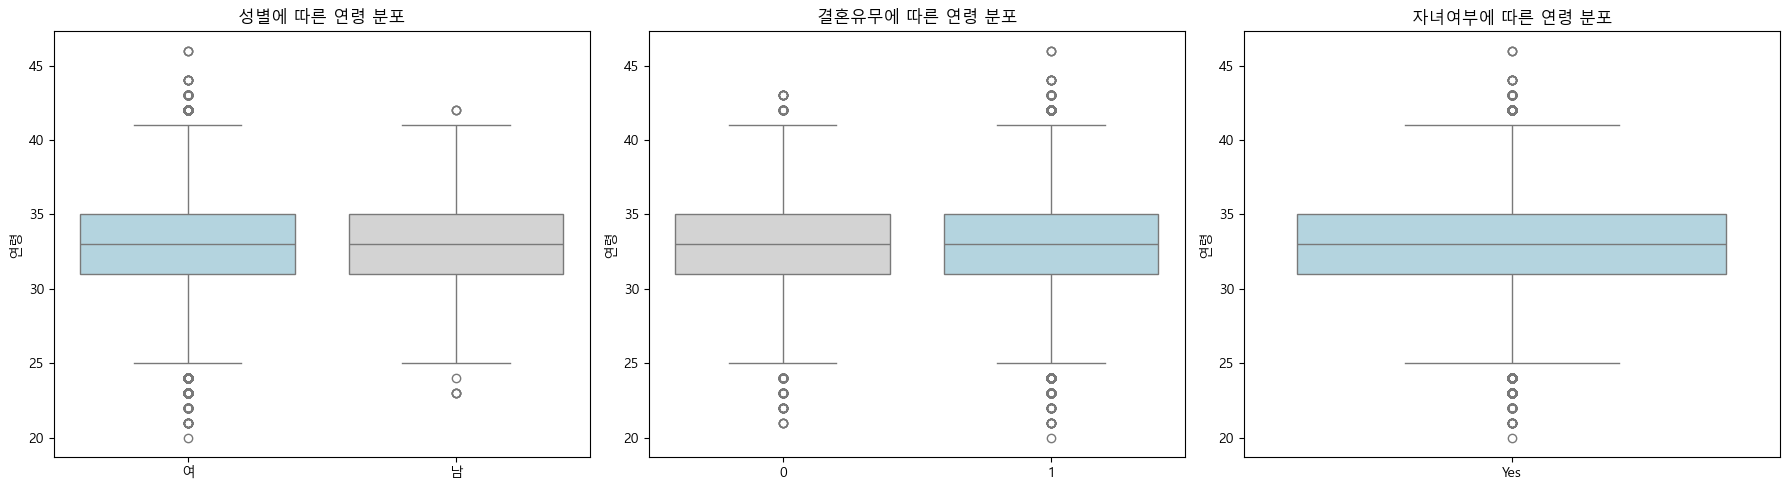

In [35]:
# 변수 목록
cols = ['성별', '결혼유무', '자녀여부']
titles = ['성별에 따른 연령 분포', '결혼유무에 따른 연령 분포', '자녀여부에 따른 연령 분포']

plt.figure(figsize=(18, 5))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    
    vc = df[col].value_counts()
    top_value = vc.index[0]

    # 가장 많은 값만 lightblue, 나머지는 lightgray
    palette = {val: ('lightblue' if val == top_value else 'lightgray') for val in vc.index}

    sns.boxplot(x=col, y='연령', hue=col, data=df, palette=palette, legend=False)
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('연령')

plt.tight_layout()
plt.show()


In [36]:
df.groupby(['성별', '결혼유무', '자녀여부'])['연령'].describe()

count       mean       std   min   25%   50%   75%   max
성별 결혼유무 자녀여부                                                             
남  0    Yes      920.0  32.410870  3.311978  23.0  30.0  33.0  35.0  41.0
   1    Yes     4975.0  32.828744  3.014243  23.0  31.0  33.0  35.0  42.0
여  0    Yes    27403.0  32.847827  2.977272  21.0  31.0  33.0  35.0  43.0
   1    Yes   152727.0  32.819835  2.946652  20.0  31.0  33.0  35.0  46.0

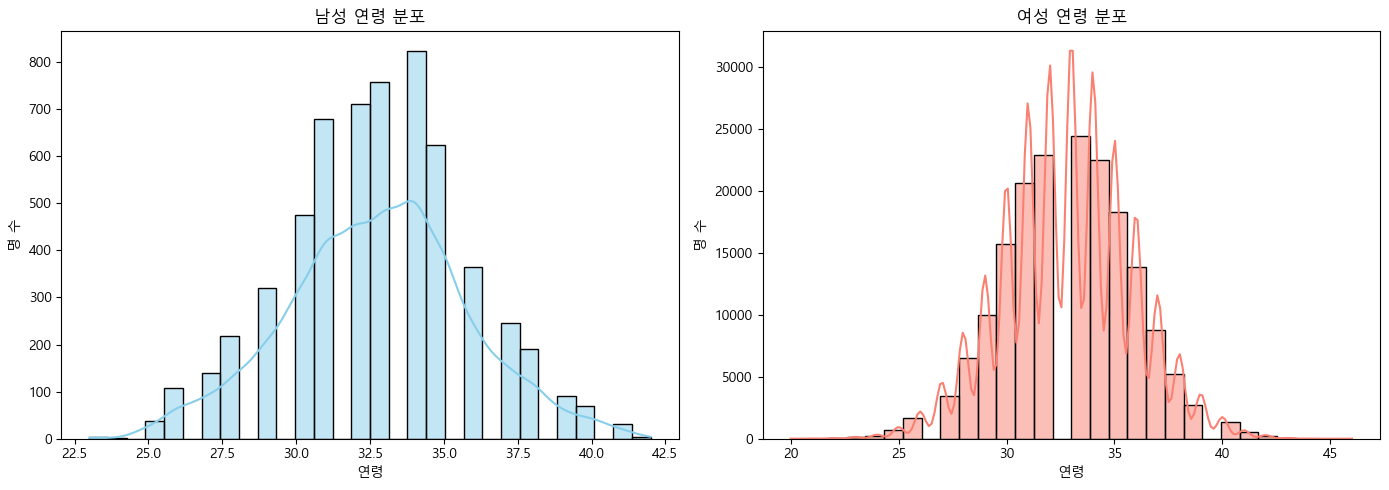

In [37]:
# 한 화면에 1행 2열 subplot 구성
plt.figure(figsize=(14, 5))

# ① 남성
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['성별'] == '남'], x='연령', bins=30, kde=True, color='skyblue')
plt.title('남성 연령 분포')
plt.xlabel('연령')
plt.ylabel('명 수')

# ② 여성
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['성별'] == '여'], x='연령', bins=30, kde=True, color='salmon')
plt.title('여성 연령 분포')
plt.xlabel('연령')
plt.ylabel('명 수')

plt.tight_layout()
plt.show()

고객 연령 분포를 성별로 비교한 결과,
전체 고객 중 여성 비율이 절대적으로 높았으며,
여성은 30~36세 사이에 집중된 반면,
남성은 좀 더 넓은 연령 분포를 보였습니다.
평균 연령은 여성 쪽이 약간 더 높았으며,
이에 따라 마케팅 타깃 설정 시 여성 30대 초중반 고객군에 최우선 집중이 필요합니다.

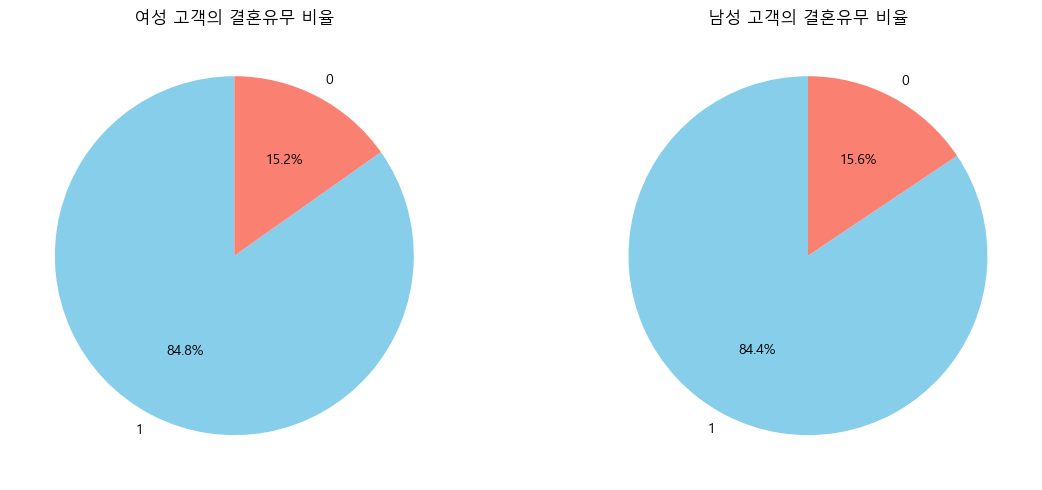

In [38]:
# 여성 / 남성 데이터 분리
여성 = df[df['성별'] == '여']
남성 = df[df['성별'] == '남']

# 색상 지정 (결혼 O: skyblue, 결혼 X: salmon)
colors = ['skyblue', 'salmon']

# subplot 구성
plt.figure(figsize=(12, 5))

# 여성
plt.subplot(1, 2, 1)
여성['결혼유무'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    ylabel=''
)
plt.title('여성 고객의 결혼유무 비율')

# 남성
plt.subplot(1, 2, 2)
남성['결혼유무'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    ylabel=''
)
plt.title('남성 고객의 결혼유무 비율')

plt.tight_layout()
plt.show()

여성 고객이 압도적으로 많고

그중 기혼 비율이 매우 높다는 걸 시각적으로 알 수 있어요
→ 따라서 "기혼 여성"이 주요 타깃층이 될 가능성이 큽니다.

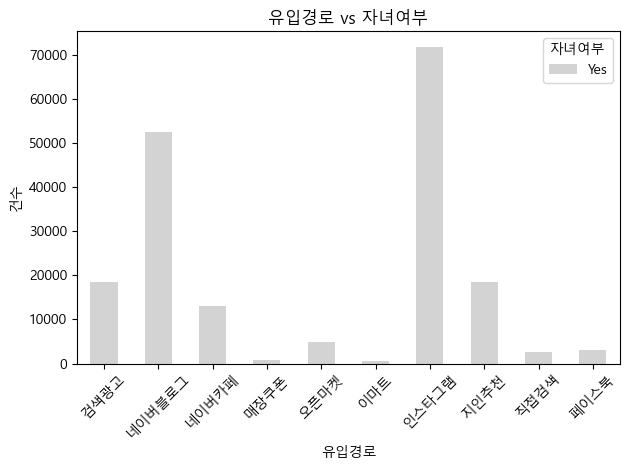

In [39]:
pd.crosstab(df['유입경로'], df['자녀여부']).plot(
    kind='bar',
    stacked=True,
    color=['lightgray', 'lightblue'] # 순서는 자녀여부 컬럼 순서에 맞게
)
plt.title('유입경로 vs 자녀여부')
plt.xticks(rotation=45)
plt.ylabel('건수')
plt.tight_layout()
plt.show()


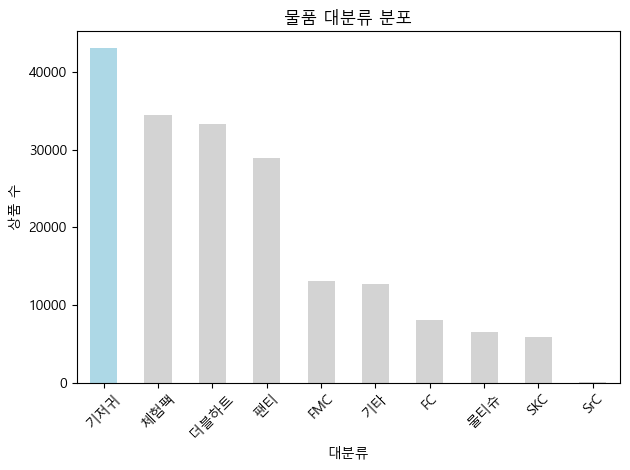

In [40]:
# 데이터 준비
counts = df['물품대분류'].value_counts()

# 색상 리스트 생성
colors = ['lightblue' if i == 0 else 'lightgray' for i in range(len(counts))]

# bar plot
counts.plot(kind='bar', color=colors)
plt.title('물품 대분류 분포')
plt.xlabel('대분류')
plt.ylabel('상품 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

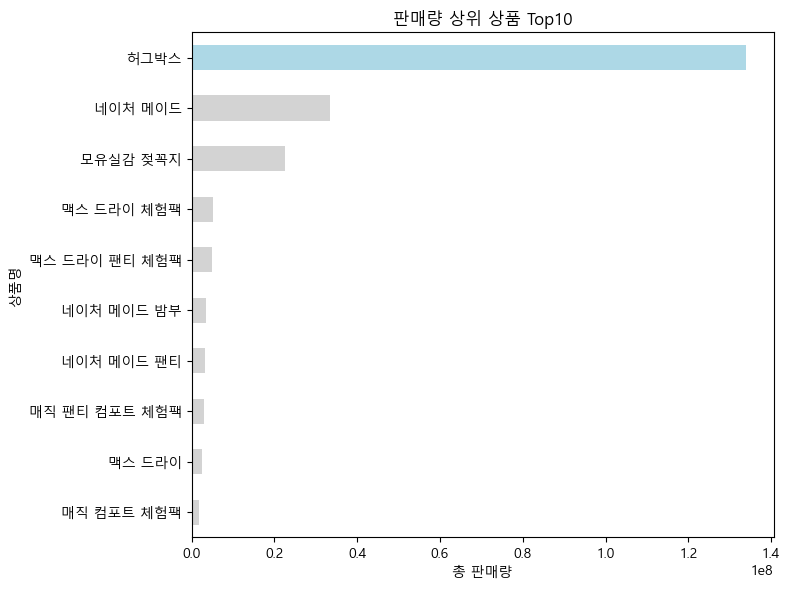

In [41]:
top10 = df.groupby('상품명_정제')['물품판매량'].sum().sort_values(ascending=False).head(10)

# 색상 리스트: 첫 번째 막대는 lightblue, 나머지는 lightgray
colors = ['lightblue'] + ['lightgray'] * (len(top10) - 1)

top10.plot(kind='barh', figsize=(8, 6), color=colors)
plt.title('판매량 상위 상품 Top10')
plt.xlabel('총 판매량')
plt.ylabel('상품명')
plt.gca().invert_yaxis()  # 큰 값이 위로 오게
plt.tight_layout()
plt.show()

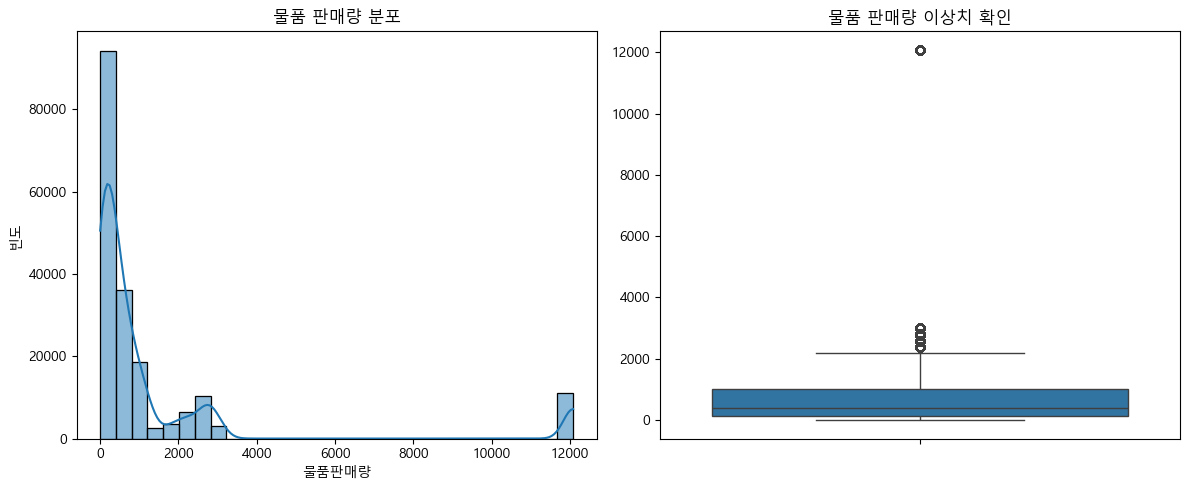

In [42]:
plt.figure(figsize=(12, 5))

# ① histogram
plt.subplot(1, 2, 1)
sns.histplot(df['물품판매량'], bins=30, kde=True)
plt.title('물품 판매량 분포')
plt.xlabel('물품판매량')
plt.ylabel('빈도')

# ② boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='물품판매량', data=df)
plt.title('물품 판매량 이상치 확인')
plt.ylabel('')

plt.tight_layout()
plt.show()

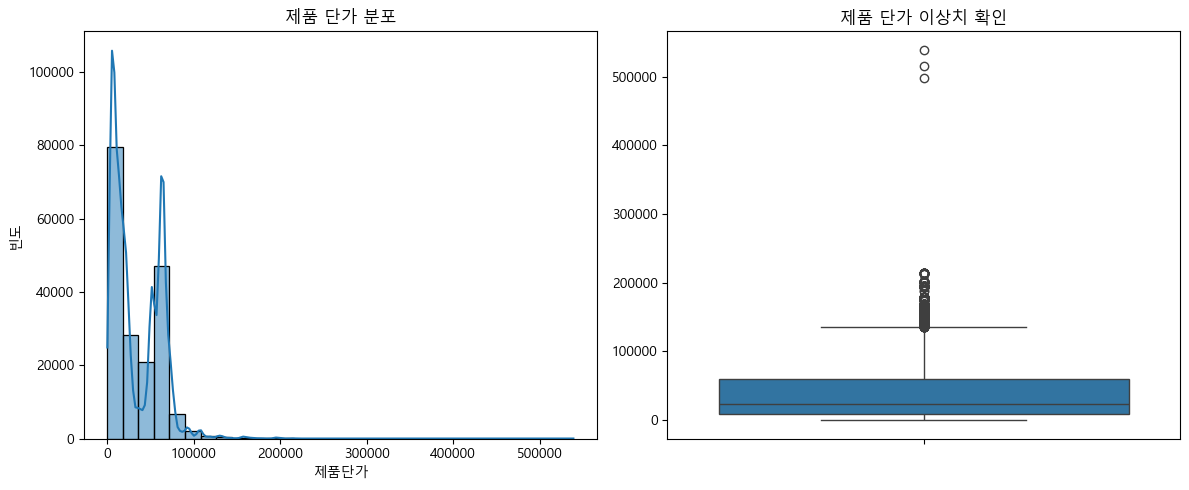

In [43]:
plt.figure(figsize=(12, 5))

# ① 히스토그램 + KDE
plt.subplot(1, 2, 1)
sns.histplot(df['제품단가'], bins=30, kde=True)
plt.title('제품 단가 분포')
plt.xlabel('제품단가')
plt.ylabel('빈도')

# ② 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(y='제품단가', data=df)
plt.title('제품 단가 이상치 확인')
plt.ylabel('')

plt.tight_layout()
plt.show()


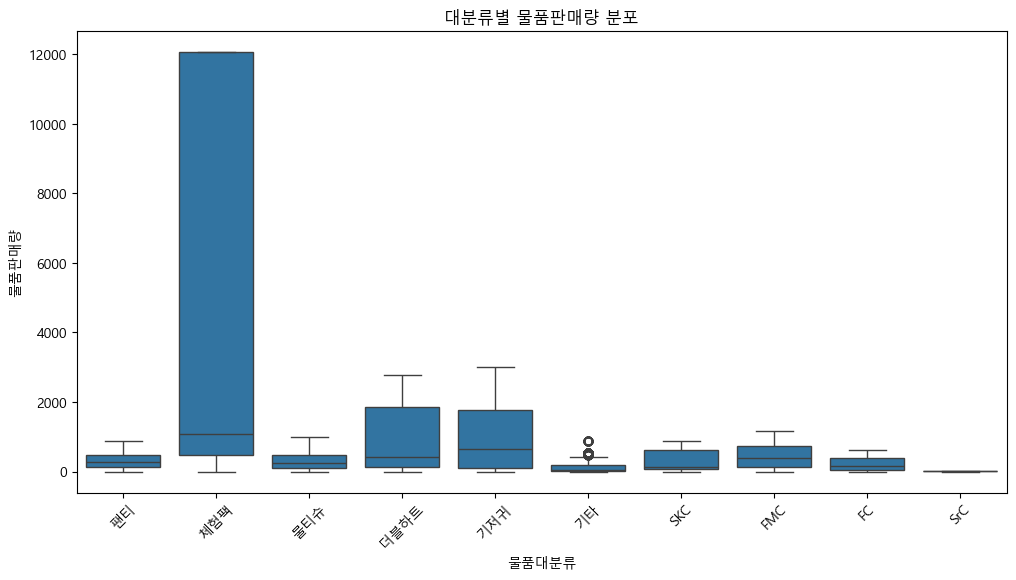

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='물품대분류', y='물품판매량', data=df)
plt.title('대분류별 물품판매량 분포')
plt.xticks(rotation=45)
plt.show()

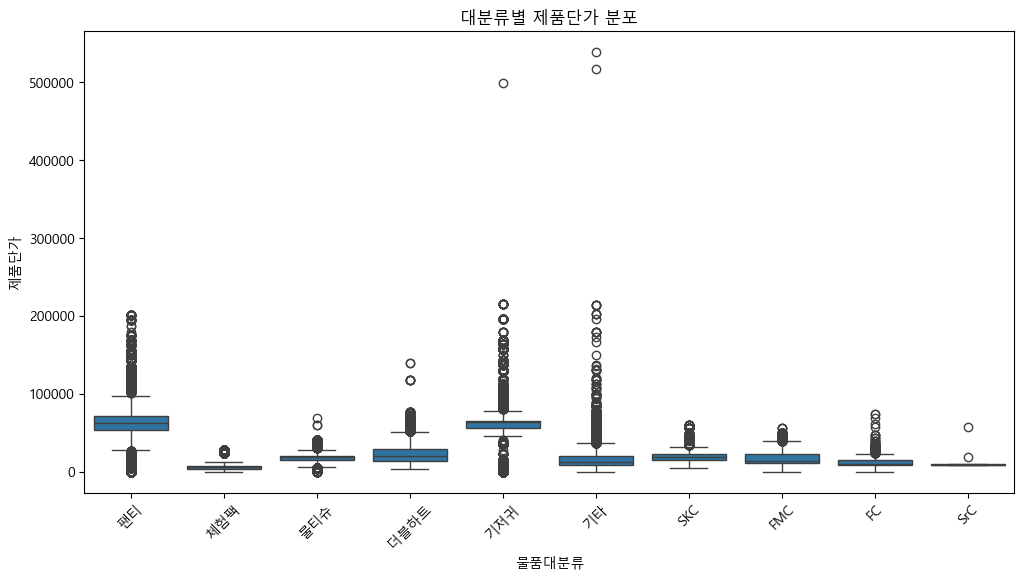

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='물품대분류', y='제품단가', data=df)
plt.title('대분류별 제품단가 분포')
plt.xticks(rotation=45)
plt.show()

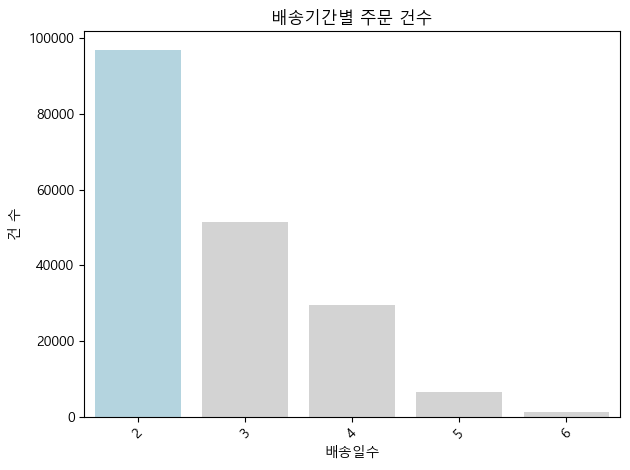

In [48]:
df['구매일'] = pd.to_datetime(df['구매일'])
df['배송완료일'] = pd.to_datetime(df['배송완료일'])
df['배송시작일'] = pd.to_datetime(df['배송시작일'])
df['배송기간'] = (df['배송완료일'] - df['배송시작일']).dt.days

# 배송기간별 건수
vc = df['배송기간'].value_counts()
order = vc.sort_index().index  # x축 순서 고정
top_value = vc.idxmax()

# palette 생성
palette = {k: ('lightblue' if k == top_value else 'lightgray') for k in order}

# 시각화
sns.countplot(x='배송기간', data=df, order=order, hue='배송기간', palette=palette, legend=False)
plt.title('배송기간별 주문 건수')
plt.xlabel('배송일수')
plt.ylabel('건 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 소비자 입장에서는 3일 이내 배송을 기대

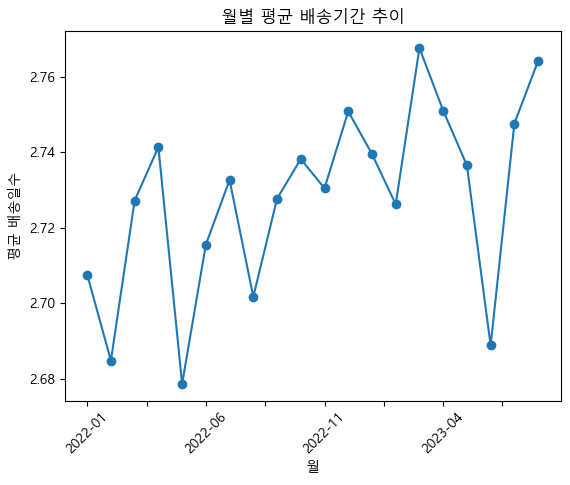

In [49]:
df['배송완료월'] = df['배송완료일'].dt.to_period('M').astype(str)
배송월별 = df.groupby('배송완료월')['배송기간'].mean()

배송월별.plot(kind='line', marker='o')
plt.title('월별 평균 배송기간 추이')
plt.xlabel('월')
plt.ylabel('평균 배송일수')
plt.xticks(rotation=45)
plt.show()

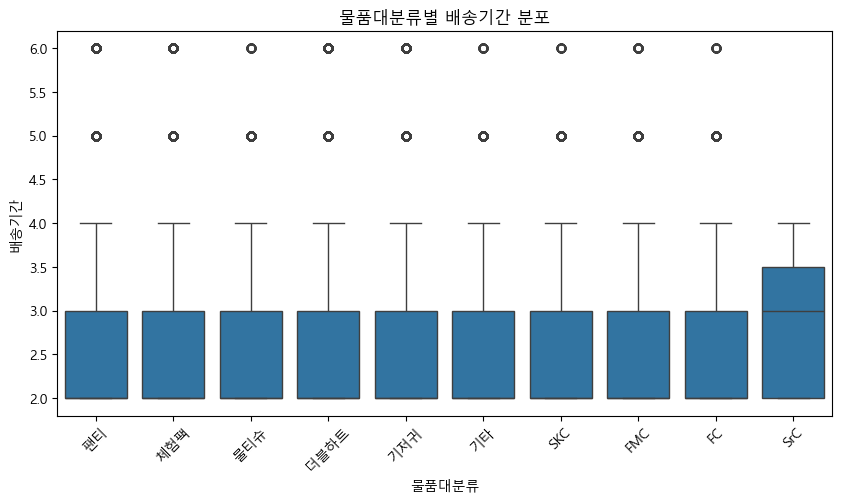

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(x='물품대분류', y='배송기간', data=df)
plt.title('물품대분류별 배송기간 분포')
plt.xticks(rotation=45)
plt.show()

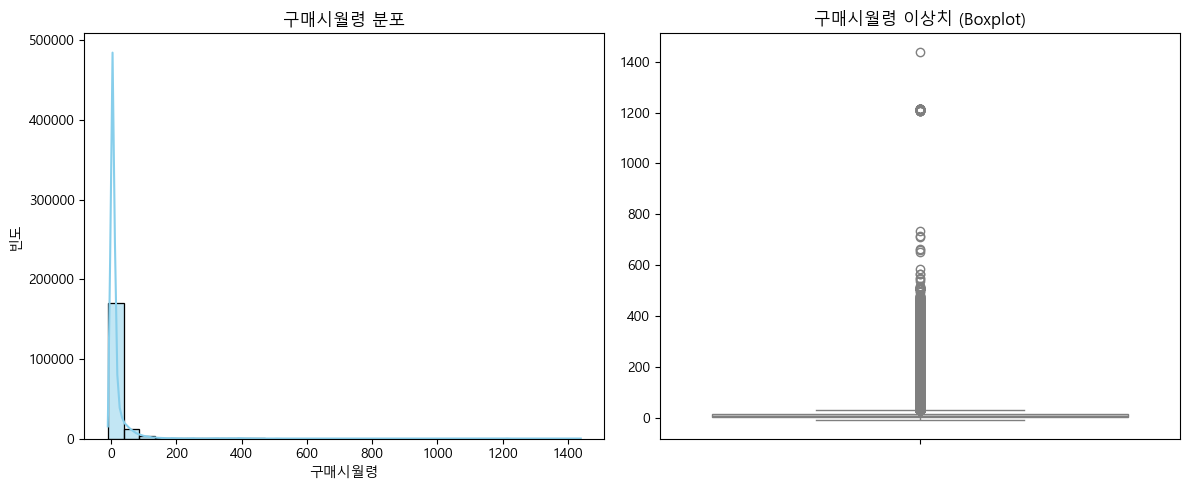

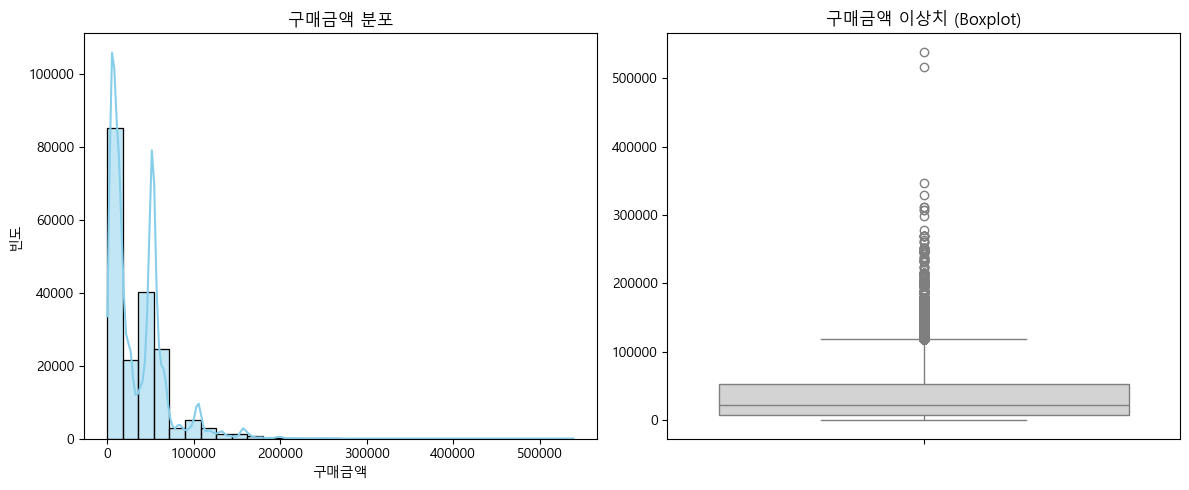

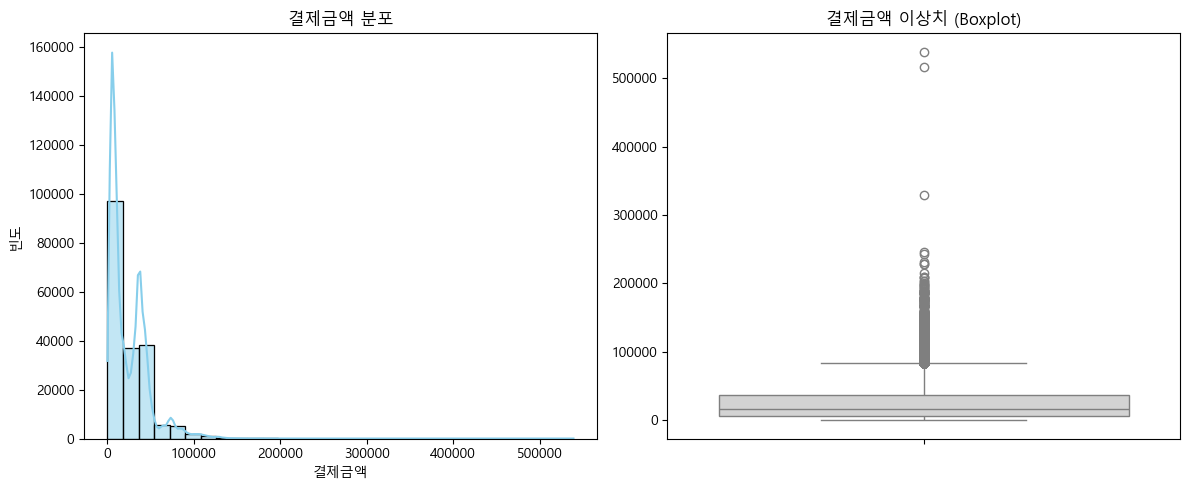

In [51]:
num_cols = ['구매시월령', '구매금액', '결제금액']

for col in num_cols:

    # subplot 구성
    plt.figure(figsize=(12, 5))

    # ① 히스토그램 + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('빈도')

    # ② 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='lightgray')
    plt.title(f'{col} 이상치 (Boxplot)')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

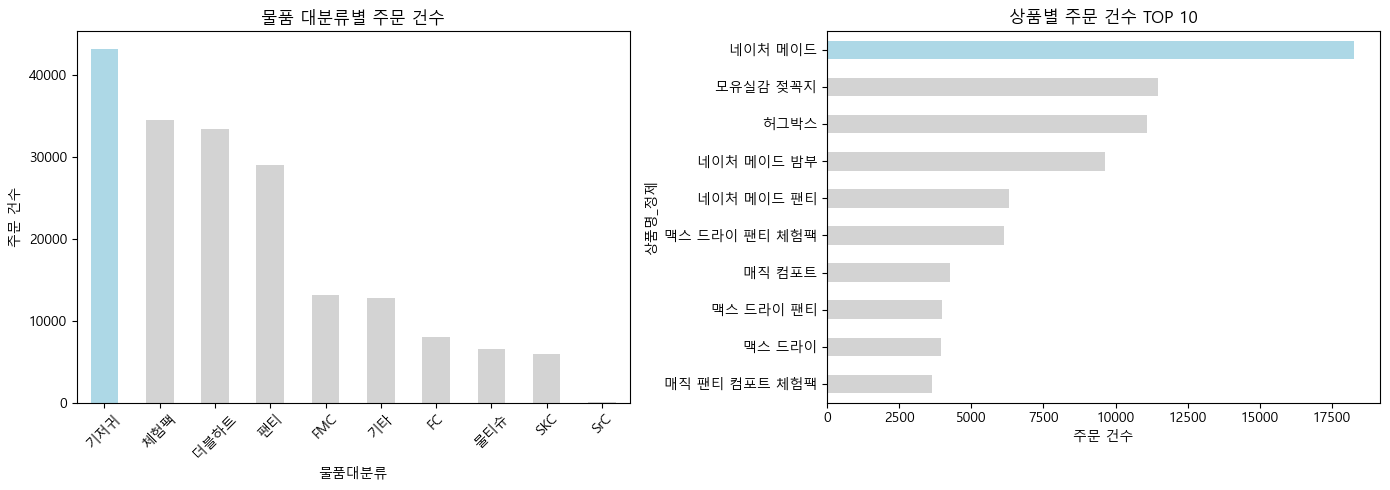

In [52]:
# 데이터 준비
cat_counts = df['물품대분류'].value_counts()
top_items = df['상품명_정제'].value_counts().head(10)

# 색상 설정
cat_colors = ['lightblue' if i == 0 else 'lightgray' for i in range(len(cat_counts))]
top_colors = ['lightblue'] + ['lightgray'] * (len(top_items) - 1)

# subplot 구성
plt.figure(figsize=(14, 5))

# ① 대분류별 주문 건수
plt.subplot(1, 2, 1)
cat_counts.plot(kind='bar', color=cat_colors)
plt.title('물품 대분류별 주문 건수')
plt.xticks(rotation=45)
plt.ylabel('주문 건수')

# ② 상품별 주문 건수 TOP 10
plt.subplot(1, 2, 2)
top_items.plot(kind='barh', color=top_colors)
plt.title('상품별 주문 건수 TOP 10')
plt.xlabel('주문 건수')
plt.gca().invert_yaxis()  # 높은 순이 위로 오도록

plt.tight_layout()
plt.show()

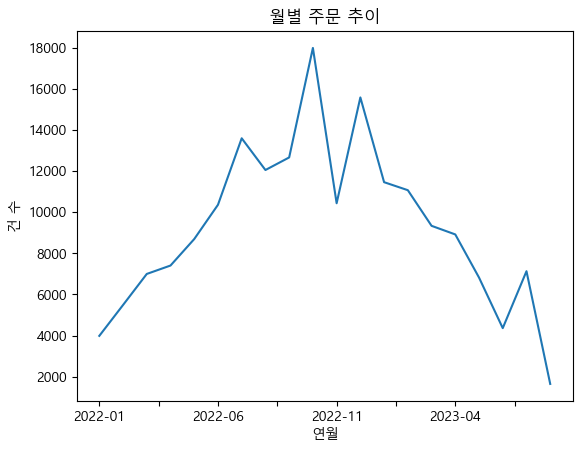

In [53]:
df['구매연월'] = df['구매일'].dt.to_period('M').astype(str)

# 월별 주문량 추이
df['구매연월'].value_counts().sort_index().plot(kind='line')
plt.title('월별 주문 추이')
plt.xlabel('연월')
plt.ylabel('건 수')
plt.show()

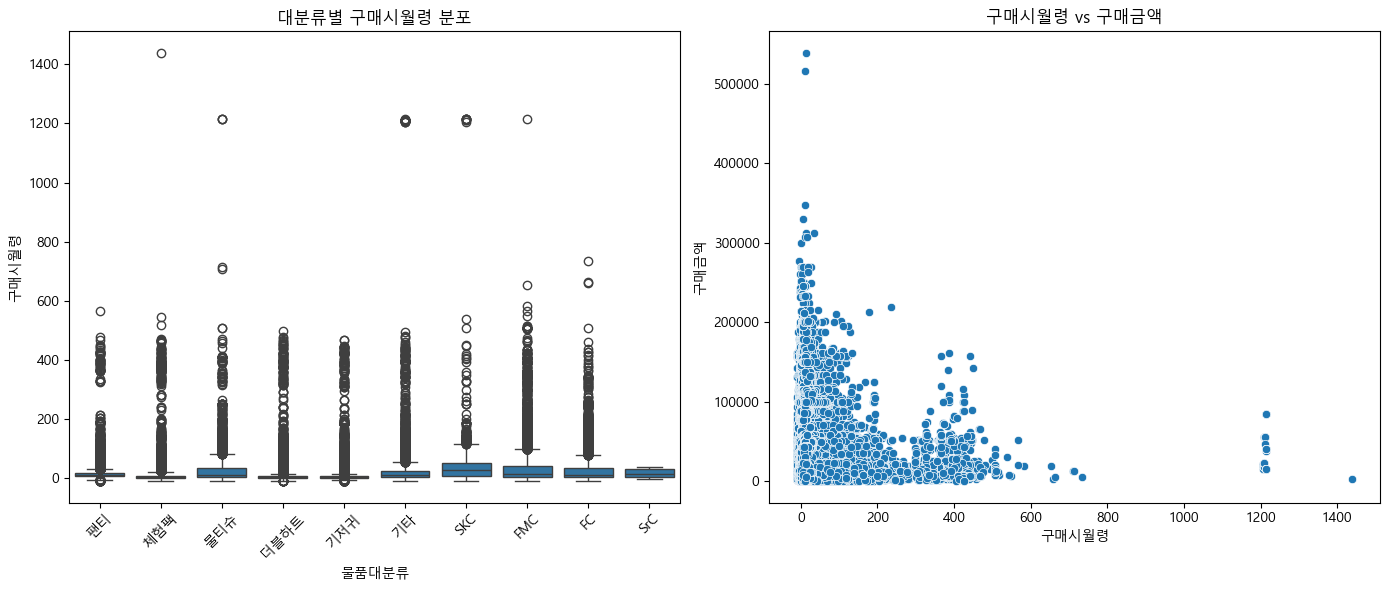

In [55]:
plt.figure(figsize=(14, 6))

# ① 대분류별 구매시월령 boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='물품대분류', y='구매시월령', data=df)
plt.title('대분류별 구매시월령 분포')
plt.xticks(rotation=45)
plt.xlabel('물품대분류')
plt.ylabel('구매시월령')

# ② 구매시월령 vs 구매금액 scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='구매시월령', y='구매금액', data=df)
plt.title('구매시월령 vs 구매금액')
plt.xlabel('구매시월령')
plt.ylabel('구매금액')

plt.tight_layout()
plt.show()

구매금액은 대부분 어린 연령대(0~100개월)에서 발생하며, 월령이 커질수록 구매 비중과 금액이 모두 감소하는 경향이 뚜렷하다.

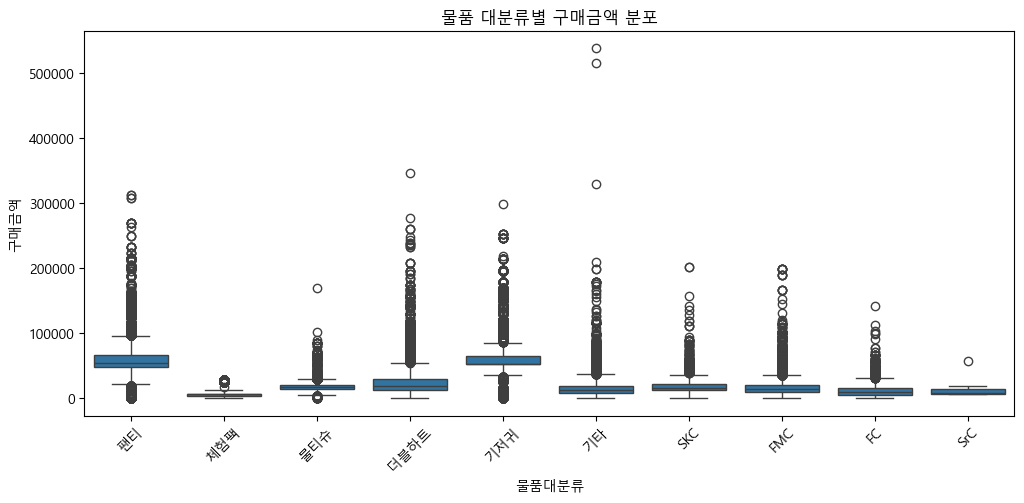

In [56]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='물품대분류', y='구매금액', data=df)
plt.title('물품 대분류별 구매금액 분포')
plt.xticks(rotation=45)
plt.show()

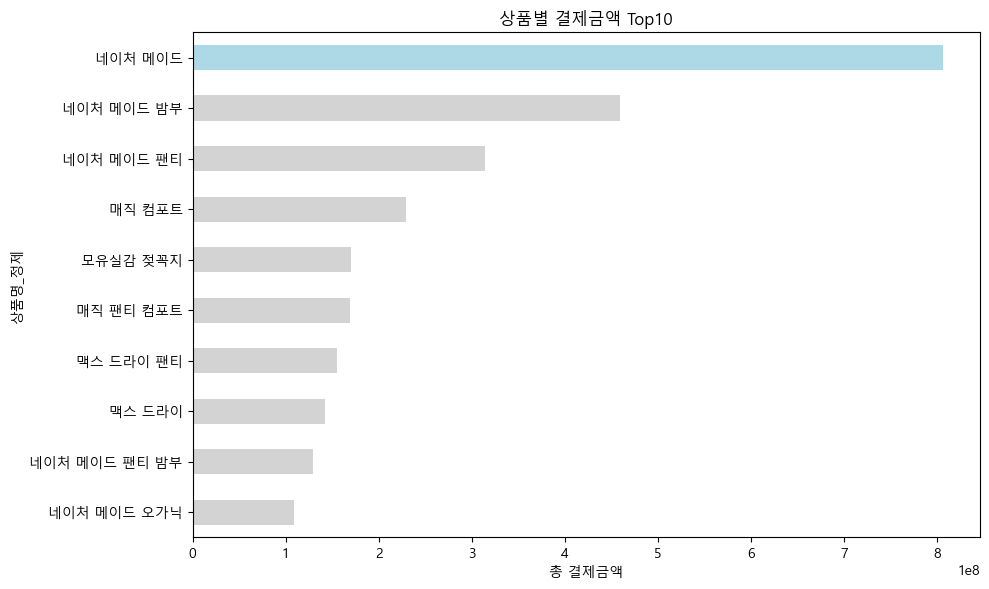

In [57]:
top_items = df.groupby('상품명_정제')['결제금액'].sum().sort_values(ascending=False).head(10)

colors = ['lightblue'] + ['lightgray'] * (len(top_items) - 1)

# figsize 명시적으로 추가
top_items.plot(kind='barh', color=colors, figsize=(10, 6))  # ← 여기에 figsize 추가
plt.title('상품별 결제금액 Top10')
plt.xlabel('총 결제금액')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [58]:
df['구매일_요일'] = df['구매일'].dt.dayofweek
df.groupby('구매일_요일')['주문번호'].nunique()

구매일_요일
0    27408
1    26972
2    19599
3    17870
4    26835
5    28755
6    28625
Name: 주문번호, dtype: int64

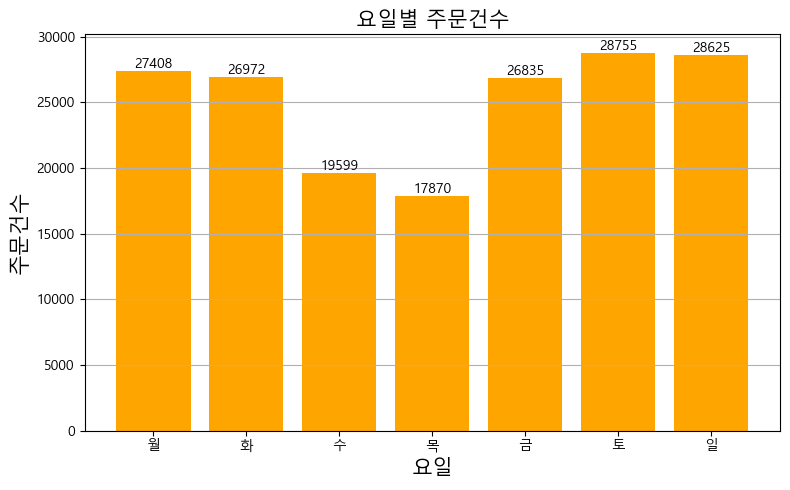

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows 사용자는 'Malgun Gothic', macOS는 'AppleGothic'

# 요일별 주문건수 집계
order_by_day = df.groupby('구매일_요일')['주문번호'].nunique()
day_names = ['월', '화', '수', '목', '금', '토', '일']
order_by_day.index = [day_names[i] for i in order_by_day.index]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(order_by_day.index, order_by_day.values, color='orange')

# 막대 위에 숫자 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('요일별 주문건수', fontsize=15)
plt.xlabel('요일', fontsize=15)
plt.ylabel('주문건수', fontsize=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

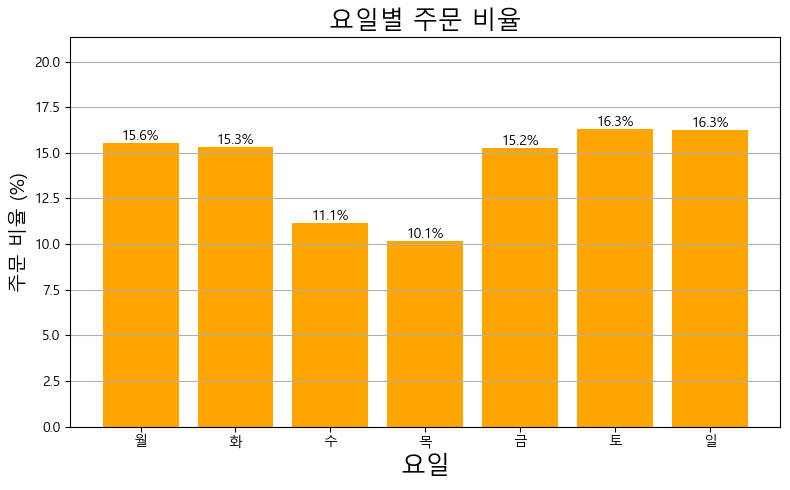

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # macOS는 'AppleGothic'

# 요일별 고유 주문건수 및 비율 계산
order_by_day = df.groupby('구매일_요일')['주문번호'].nunique()
order_ratio = order_by_day / order_by_day.sum() * 100  # 비율(%)

# 요일 인덱스 변환
day_names = ['월', '화', '수', '목', '금', '토', '일']
order_ratio.index = [day_names[i] for i in order_ratio.index]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(order_ratio.index, order_ratio.values, color='orange')

# 막대 위에 비율 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('요일별 주문 비율', fontsize=18)
plt.xlabel('요일', fontsize=18)
plt.ylabel('주문 비율 (%)', fontsize=14)
plt.ylim(0, order_ratio.max() + 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

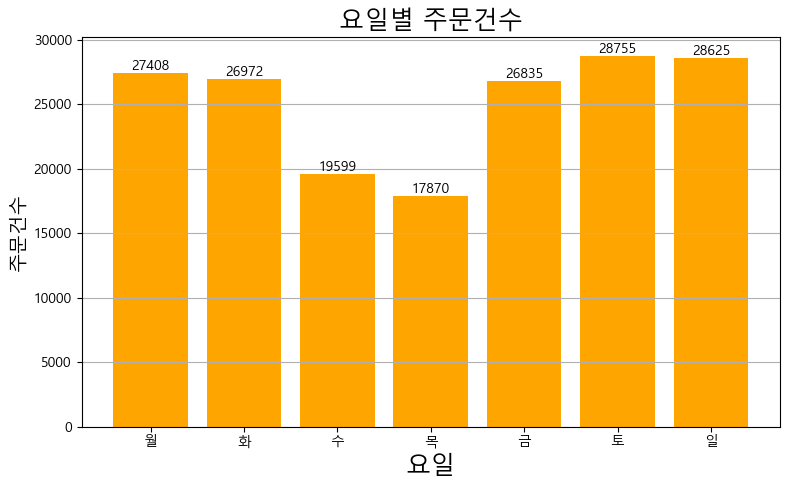

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # macOS는 'AppleGothic'

# 요일별 주문건수 집계
order_by_day = df.groupby('구매일_요일')['주문번호'].nunique()
day_names = ['월', '화', '수', '목', '금', '토', '일']
order_by_day.index = [day_names[i] for i in order_by_day.index]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(order_by_day.index, order_by_day.values, color='orange')

# 막대 위에 숫자 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('요일별 주문건수', fontsize=18)
plt.xlabel('요일',  fontsize=18)
plt.ylabel('주문건수',  fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


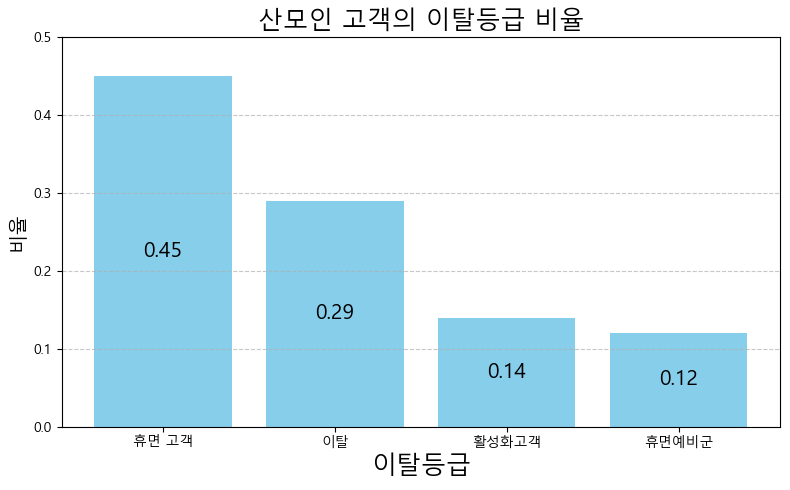

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # macOS는 'AppleGothic'

# 구매시월령 < 0인 고객의 이탈등급 비율 계산
leaver_ratio = df[df['구매시월령'] < 0]['이탈등급'].value_counts(normalize=True).round(2)

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(leaver_ratio.index, leaver_ratio.values, color='skyblue')

# 막대 안에 비율 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2,
             f'{height:.2f}', ha='center', va='center', fontsize=15, color='black')

plt.title('산모인 고객의 이탈등급 비율', fontsize=18)
plt.xlabel('이탈등급', fontsize=18)
plt.ylabel('비율', fontsize=14)
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

mq = pd.read_excel('../data/맘큐뉴스.xlsx') 

In [7]:
# 분석에 사용할 컬럼만 선택
use_cols = ['일자','키워드','특성추출(가중치순 상위 50개)', '본문','URL']
mq = mq[use_cols]

mq['일자'] = pd.to_datetime(mq['일자'], format='%Y%m%d')

df['쿠폰적가'] = np.where(df['상품명_정제'].str.contains('쿠폰'), '1',0)
df['상품명_정제'] = df['상품명_정제'].str.replace('쿠폰적가','', regex=True)
df['상품명_정제'] = df['상품명_정제'].str.replace('쿠폰','', regex=True)

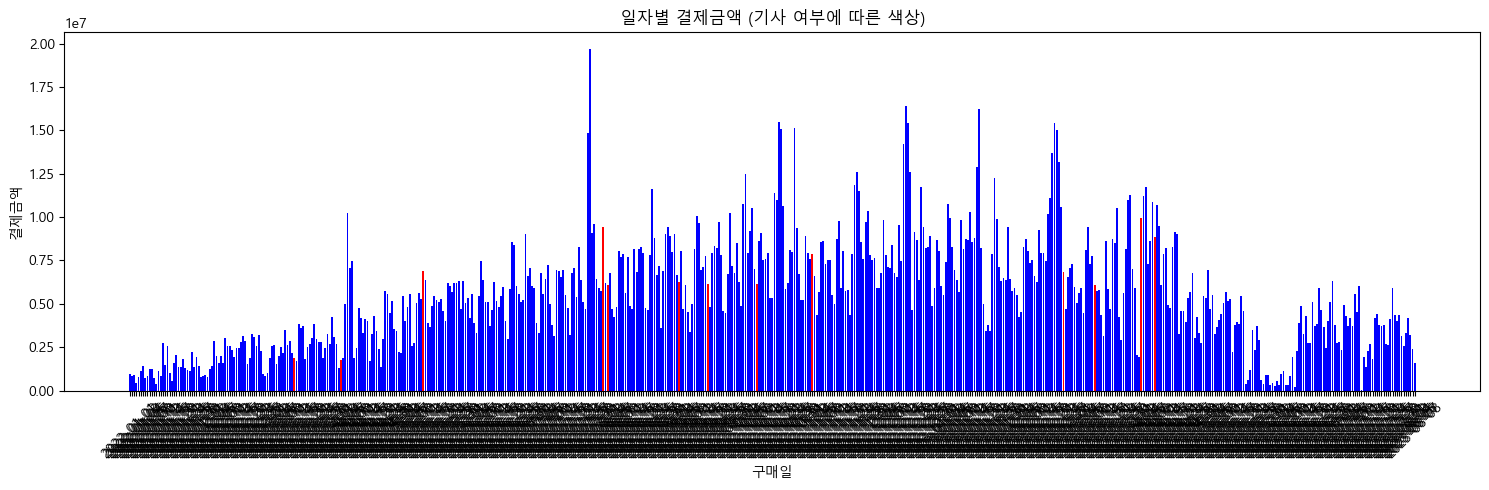

In [8]:
# '기저귀' 관련 기사 데이터 추출

기저귀_일자 = mq[mq['키워드'].str.contains('기저귀')][['일자','특성추출(가중치순 상위 50개)']].reset_index()
기저귀_일자 = 기저귀_일자[['일자','특성추출(가중치순 상위 50개)']]
기저귀_일자['기사']=1
기저귀_일자.columns=['구매일','특성추출(상위50개)','기사']
기저귀_일자['구매일'] = 기저귀_일자['구매일'].astype(str)

일자별매출_기저귀 = df[(df['물품대분류']=='팬티')|(df['물품대분류']=='기저귀')].groupby(['구매일'])['결제금액'].sum()
일자별매출_기저귀 = pd.DataFrame(일자별매출_기저귀).reset_index()
일자별매출_기저귀['구매일'] = 일자별매출_기저귀['구매일'].astype(str)

기저귀기사 = pd.merge(일자별매출_기저귀, 기저귀_일자, on='구매일', how='left')
기저귀기사 = 기저귀기사.fillna(0)

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

# 1. 색상 조건부 리스트 생성
colors = ['red' if v == 1 else 'blue' for v in 기저귀기사['기사']]

# 2. 그래프 출력
plt.figure(figsize=(15, 5))
plt.bar(기저귀기사['구매일'], 기저귀기사['결제금액'], color=colors)
plt.title('일자별 결제금액 (기사 여부에 따른 색상)')
plt.xlabel('구매일')
plt.ylabel('결제금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
filtered = 기저귀기사[기저귀기사['기사'] == 1].drop_duplicates()
매출상승한_날짜 = filtered.loc[:, ['구매일','특성추출(상위50개)']]
매출상승한_날짜['구매일'] = pd.to_datetime(매출상승한_날짜['구매일'])

# 구매일도 datetime 형식이어야 함
기저귀기사['구매일'] = pd.to_datetime(기저귀기사['구매일'])

from datetime import timedelta

result = []

for 기준일 in 매출상승한_날짜['구매일']:
    # 1일 비교
    전일 = 기저귀기사[(기저귀기사['구매일'] >= 기준일 - timedelta(days=1)) & 
                     (기저귀기사['구매일'] < 기준일)]
    후일 = 기저귀기사[(기저귀기사['구매일'] > 기준일) & 
                     (기저귀기사['구매일'] <= 기준일 + timedelta(days=1))]
    
    # 1일 비교
    전주 = 기저귀기사[(기저귀기사['구매일'] >= 기준일 - timedelta(days=7)) & 
                     (기저귀기사['구매일'] < 기준일)]
    후주 = 기저귀기사[(기저귀기사['구매일'] > 기준일) & 
                     (기저귀기사['구매일'] <= 기준일 + timedelta(days=7))]

    # 1개월 비교
    전월 = 기저귀기사[(기저귀기사['구매일'] >= 기준일 - timedelta(days=30)) & 
                     (기저귀기사['구매일'] < 기준일)]
    후월 = 기저귀기사[(기저귀기사['구매일'] > 기준일) & 
                     (기저귀기사['구매일'] <= 기준일 + timedelta(days=30))]

    result.append({
        '기준일': 기준일.date(),
        '전일대비후일_매출diff': 후일['결제금액'].sum() - 전일['결제금액'].sum(),
        '전주대비후주_매출': 후주['결제금액'].sum() - 전주['결제금액'].sum(),
        '전월대비후월_매출': 후월['결제금액'].sum() - 전월['결제금액'].sum(),
        '기사내용': 매출상승한_날짜[매출상승한_날짜['구매일']==기준일]['특성추출(상위50개)']
    })

# 데이터프레임으로 변환
df_매출비교 = pd.DataFrame(result)
df_매출비교 = df_매출비교.drop_duplicates(subset='기준일', keep='first')
df_매출비교['기준일'] = pd.to_datetime(df_매출비교['기준일'])

df_매출비교 = df_매출비교[df_매출비교['기준일'].isin(['2022-03-17', '2022-10-13', '2022-04-07', '2022-09-08', '2022-09-21', '2023-04-07', '2023-04-13'])]

df_매출비교.loc[:,'이벤트']= ['친환경 오가닉 기저귀 출시', '기저귀의 누적 기부량', '비닐포장재 재활용 캠페인', '이른둥이용 초소형 기저귀 누적 기부 400판매', '우주패스', '썸머 기저귀·물티슈', '맥스드라이 출시']

df_매출비교

# RFM 분석
- Recency: 마지막 구매 이후 지난 일수
- Frequency: 전체 구매 횟수
- Monetary: 전체(또는 평균) 구매 금액

In [6]:
import pandas as pd

# 0) 기준일 정의
snapshot_date = df['배송완료일'].max() + pd.Timedelta(days=1)

# 1) RFM 집계
rfm = df.groupby('고객번호').agg({
    '배송완료일': lambda x: (snapshot_date - x.max()).days,
    '주문번호':  'nunique',
    '결제금액':  'sum'
}).rename(columns={
    '배송완료일': 'Recency',
    '주문번호':  'Frequency',
    '결제금액':  'Monetary'
})

# 2) 스코어링
# Recency: 값이 작을수록 점수 높음
rfm['R_score'] = pd.qcut(
    rfm['Recency'],
    q=5,
    labels=[5,4,3,2,1],
    duplicates='drop'
).astype(int)

# Frequency: 동일값 문제를 피하기 위해 rank 이용
rfm['F_score'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    q=5,
    labels=[1,2,3,4,5]
).astype(int)

# Monetary: 동일값 문제를 피하기 위해 rank 이용
rfm['M_score'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    q=5,
    labels=[1,2,3,4,5]
).astype(int)

# 3) RFM 조합
rfm['RFM_Segment'] = (
    rfm['R_score'].astype(str)
  + rfm['F_score'].astype(str)
  + rfm['M_score'].astype(str)
)
rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

# 결과 확인
print(rfm[['Recency','R_score','Frequency','F_score','Monetary','M_score','RFM_Segment','RFM_Score']].head())
print("\nR_score 분포:\n", rfm['R_score'].value_counts().sort_index())
print("\nF_score 분포:\n", rfm['F_score'].value_counts().sort_index())
print("\nM_score 분포:\n", rfm['M_score'].value_counts().sort_index())


                 Recency  R_score  Frequency  F_score  Monetary  M_score  \
고객번호                                                                       
201812310749735      173        4          2        3     54083        4   
201812310749771      456        1          1        1     95844        5   
201812310749774      378        2          2        3    116532        5   
201812310749780      559        1          1        1     19900        3   
201812310749783       31        5          4        5    170124        5   

                RFM_Segment  RFM_Score  
고객번호                                    
201812310749735         434         11  
201812310749771         115          7  
201812310749774         235         10  
201812310749780         113          5  
201812310749783         555         15  

R_score 분포:
 R_score
1    13841
2    13810
3    13758
4    14097
5    13952
Name: count, dtype: int64

F_score 분포:
 F_score
1    13892
2    13891
3    13892
4    13891
5    13892


1. **고객별 대표 세그먼트 예시**

   * `201812310749783` (RFM=5-5-5, Score=15):

     * **가장 최근에 구매**(Recency=31일), **구매횟수 상위 20%**, **지출금액 상위 20%**
     * 전형적인 **VIP 고객**으로, 로열티 프로그램·프리미엄 혜택 대상
   * `201812310749735` (RFM=4-3-4, Score=11):

     * 비교적 최근(173일) 재구매, 중간 이상의 빈도·지출
     * **충성 고객**군(“Loyal”)으로 분류해 업셀링·크로스셀링 전략
   * `201812310749774` (RFM=2-3-5, Score=10):

     * 최근 이탈 구간(378일)이나 **높은 지출**(상위 20%)
     * **휴면 전환 위험 고객** → 재활성화 캠페인 필요
   * `201812310749771` (RFM=1-1-5, Score=7):

     * 오랜 비구매(456일), **지출은 높음**
     * **휴면 VIP 후보** → “보고 싶었어요” 메시지 + 전용 혜택
   * `201812310749780` (RFM=1-1-3, Score=5):

     * **이탈 위험군**(오랜 기간 미구매·낮은 빈도·중간 지출)
     * 우선순위 낮은 재관여 타깃, 대규모 캠페인 대상

2. **점수 분포의 균등함**

   * 각 R/F/M 점수 구간(1\~5점)에 고객이 거의 동일한 수로 분포
   * **균질한 세분화**가 잘 이뤄져 있어, 모든 세그먼트에 유사한 규모의 마케팅 자원 배분 가능

3. **세그먼트 활용 포인트**

   * **최우수(VIP, 555)**: 유지·강화
   * **Loyal(4xx, x4x 등)**: 업셀링·신제품 제안
   * **휴면 전환 위험(2xx, x2x)**: 재관여·리텐션 캠페인
   * **이탈(1xx, xx1)**: 대규모 할인·맞춤 광고로 복귀 유도

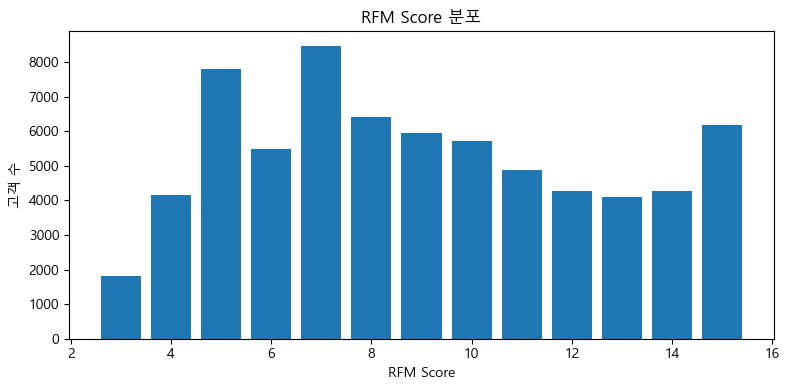

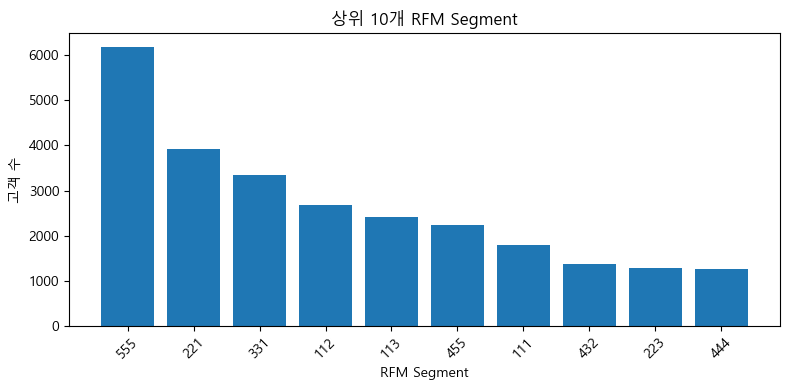

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1) 한글 폰트 설정 (Windows 예시: Malgun Gothic)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 축마이너스(–)가 깨지는 문제 방지

# ✅ RFM Score별 고객 수 집계
rfm_score_counts = rfm['RFM_Score'].value_counts().sort_index()

# ✅ 상위 10개 RFM Segment 집계
top_segments = rfm['RFM_Segment'].value_counts().head(10)

# 2) 다시 시각화 코드 실행
# RFM Score 분포
plt.figure(figsize=(8,4))
plt.bar(rfm_score_counts.index, rfm_score_counts.values)
plt.xlabel('RFM Score')
plt.ylabel('고객 수')
plt.title('RFM Score 분포')
plt.tight_layout()
plt.show()

# 상위 10개 RFM Segment 분포
plt.figure(figsize=(8,4))
plt.bar(top_segments.index, top_segments.values)
plt.xlabel('RFM Segment')
plt.ylabel('고객 수')
plt.title('상위 10개 RFM Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. RFM Score 분포 (위쪽 차트)
- 스코어 범위는 3점(최소)에서 15점(최대) 사이입니다.

- 가장 많은 고객이 몰려 있는 구간은 7점(약 8,400명)과 5점(약 7,800명)입니다.

- 스코어가 낮을수록(34점) 재구매 가능성이 낮거나 마지막 구매가 오래된 고객,
- 스코어가 높을수록(1315점) VIP 고객(최근·빈도·지출 모두 상위)임을 의미합니다.

- 전체적으로 중간값(7~9점)에 고객이 집중되어 있어, 아직 완전한 VIP도 아니고 완전히 이탈한 것도 아닌 “잠재 성장 고객”이 많다는 뜻입니다.

2. 상위 10개 RFM Segment (아래쪽 차트)
| 세그먼트                           | 의미                                         |
| ------------------------------ | ------------------------------------------ |
| **VIP (555)**                  | 최근 구매·빈도·지출 모두 상위 → 핵심 로열티 고객              |
| **휴면 위험 (221, 112, 113, 111)** | 마지막 구매 오래됨·낮은 재구매 빈도 → 복귀 유도 필요            |
| **안정 고객**           | Recency·Frequency·Monetary 중간 → 꾸준한 재구매 그룹 |
| **신규/고빈도 중저가**      | 최근 가입·적극적 구매(중저가) → 2차 구매 전환 타깃            |


3. 요약
- 대다수가 중간 스코어(7~9점)에 분포: “성장 잠재력이 큰 중간 고객”

- 최우수 VIP(555)와 휴면 위험(221), 신규(112)·잠재 VIP(113) 등 5~6개 핵심 세그먼트로 묶어

- VIP 유지, 휴면 재활성화, 신규 전환 전략을 병행

# 구매건수·구매금액·배송소요시간·연령·성별 같은 행동·인구통계(DEM) 변수를 합쳐 KMeans 군집화를 수행
- 각 군집별 특성을 살펴봄

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# 1) RFM 지표 계산
snapshot_date = df['배송완료일'].max() + pd.Timedelta(days=1)
rfm = df.groupby('고객번호').agg({
    '배송완료일': lambda x: (snapshot_date - x.max()).days,
    '주문번호': 'nunique',
    '결제금액': 'sum'
}).rename(columns={
    '배송완료일': 'Recency',
    '주문번호': 'Frequency',
    '결제금액': 'Monetary'
})

# 2) 추가 행동·DEM 피처 생성
df['배송소요시간_hr'] = (
    df['배송완료일'] - df['구매일']
).dt.total_seconds() / 3600

agg = df.groupby('고객번호').agg({
    '주문번호': 'nunique',
    '결제금액': 'sum',
    '배송소요시간_hr': 'mean',
    '연령': 'first',
    '성별': 'first'
}).rename(columns={
    '주문번호': 'OrderCount',
    '결제금액': 'TotalSpend',
    '배송소요시간_hr': 'AvgShipTime'
})

# 3) 피처 통합
cust_feat = pd.concat(
    [rfm, agg[['OrderCount','TotalSpend','AvgShipTime','연령','성별']]],
    axis=1
).reset_index()

# 4) 전처리 파이프라인 구성
num_feats = ['Recency','Frequency','Monetary','OrderCount','TotalSpend','AvgShipTime','연령']
cat_feats = ['성별']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(drop='if_binary', sparse_output=False), cat_feats)
])

# 5) KMeans 군집화 (k=4로 예시)
pipeline = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))
cust_feat['Cluster'] = pipeline.fit_predict(cust_feat)

# 6) 군집별 프로파일링
num_summary = cust_feat.groupby('Cluster')[num_feats].mean().round(2)
gender_summary = (
    cust_feat
    .groupby('Cluster')['성별']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .rename(columns=lambda x: f'Gender_{x}')
    .round(2)
)

cluster_profile = pd.concat([num_summary, gender_summary], axis=1)
print(cluster_profile)


         Recency  Frequency   Monetary  OrderCount  TotalSpend  AvgShipTime  \
Cluster                                                                       
0         319.71       1.48   30082.24        1.48    30082.24       121.85   
1         120.19       5.26  154624.00        5.26   154624.00        89.41   
2          67.41      13.62  481052.54       13.62   481052.54        89.86   
3         326.16       1.46   27715.19        1.46    27715.19        81.21   

            연령  Gender_남  Gender_여  
Cluster                             
0        32.80      0.03      0.97  
1        32.84      0.03      0.97  
2        32.81      0.03      0.97  
3        32.81      0.03      0.97  


- Cluster 2 (VIP):
    - Recency가 가장 짧고, 구매 횟수·총지출이 압도적 1위.
    - 우수 고객이므로 독점 혜택·전담 서비스 강화로 유지.
- Cluster 1 (충성 고객):
    - Recency·Frequency·Monetary 모두 중상위권.
    - 재구매 가능성 높음, 번들 프로모션·교차 판매 전략 추천.
- Clusters 0 & 3 (이탈 위험군):
    - 모두 Recency 약 320일로 장기 휴면 후 1–2회 소액 구매.
    - Cluster 0은 배송소요시간이 상대적으로 느려 서비스 체감이 낮을 수 있음.
    - 재관여 캠페인(할인쿠폰, 개인화 메시지)과 배송 경험 개선으로 복귀 유도.

## 실루엣 스코어 계산, PCA 시각화

Silhouette Score: 0.280


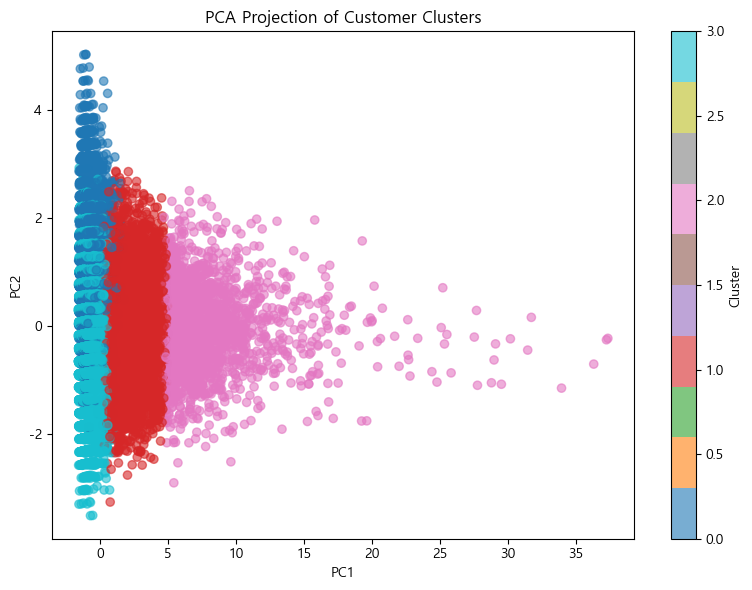

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# === (1) 고객 피처 및 군집화 파이프라인 준비 ===
# num_feats, cat_feats, cust_feat, preprocessor, pipeline 은 앞서 정의한 대로 가정

# 예: 
# num_feats = [...]
# cat_feats = ['성별']
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), num_feats),
#     ('cat', OneHotEncoder(drop='if_binary', sparse_output=False), cat_feats)
# ])
# pipeline = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))
# cust_feat['Cluster'] = pipeline.fit_predict(cust_feat)

# === (2) 특징 행렬(X) 추출 ===
# ColumnTransformer 단계에서 변환된 특성만 뽑아냅니다.
ct = pipeline.named_steps['columntransformer']
X = ct.transform(cust_feat)

# === (3) 실루엣 스코어 계산 ===
labels = cust_feat['Cluster']
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")

# === (4) PCA로 2차원 축소 ===
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# === (5) PCA 산점도 시각화 ===
plt.figure(figsize=(8,6))
scatter = plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Customer Clusters')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


- Silhouette Score = 0.28
    - 0.25~0.50 구간은 “보통 정도 분리”를 의미합니다. 즉, 군집 간 명확한 경계가 일부 있지만, 상당 부분 겹침도 있다는 뜻입니다.
- PCA 산점도 해석
    - Cluster 2 (분홍 점)
        - 가로축(PC1)에서 가장 오른쪽에 몰려 있습니다.
        - ⇒ 구매 빈도·지출이 가장 높은 VIP 고객이 명확히 분리됨.
    - Cluster 1 (빨강 점)
        - 중간 우측에 분포.
        - ⇒ 충성 고객으로 어느 정도 구분되지만, VIP보다는 덜 뚜렷함.
    - Clusters 0 & 3 (파랑·청록 점)
        - 왼쪽에 겹쳐 몰려 있어 구분이 어렵습니다.
        - ⇒ 장기 휴면·저빈도 고객이 비슷한 특성을 공유해 하나의 군집으로 합치거나, 추가 특성(예: 유입경로, 상품 카테고리)로 재정의할 필요가 있음.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    scores.append((k, silhouette_score(X, km.labels_)))

# 결과 출력
for k, s in scores:
    print(f"k={k}, Silhouette={s:.3f}")


k=2, Silhouette=0.518
k=3, Silhouette=0.212
k=4, Silhouette=0.280
k=5, Silhouette=0.225
k=6, Silhouette=0.226
k=7, Silhouette=0.221
k=8, Silhouette=0.213
k=9, Silhouette=0.202
k=10, Silhouette=0.196


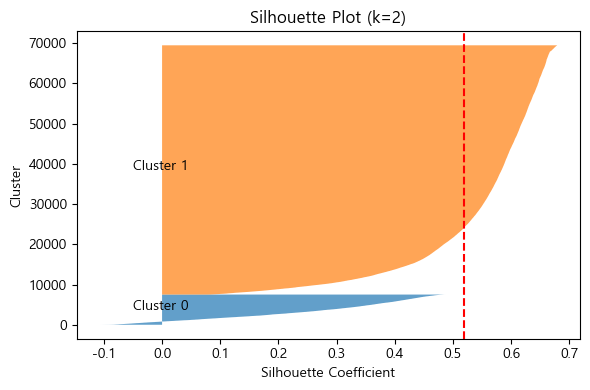

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=2, random_state=42).fit(X)
labels = km.labels_
sil_vals = silhouette_samples(X, labels)

plt.figure(figsize=(6,4))
y_lower = 10

for i in range(2):
    ith_sil = np.sort(sil_vals[labels == i])
    size = ith_sil.shape[0]
    y_upper = y_lower + size
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sil, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size, f"Cluster {i}")
    y_lower = y_upper + 10
    
plt.axvline(sil_vals.mean(), color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot (k=2)")
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# 1) RFM 지표 계산
snapshot_date = df['배송완료일'].max() + pd.Timedelta(days=1)
rfm = df.groupby('고객번호').agg({
    '배송완료일': lambda x: (snapshot_date - x.max()).days,
    '주문번호': 'nunique',
    '결제금액': 'sum'
}).rename(columns={
    '배송완료일': 'Recency',
    '주문번호': 'Frequency',
    '결제금액': 'Monetary'
})

# 2) 추가 행동·DEM 피처 생성
df['배송소요시간_hr'] = (
    df['배송완료일'] - df['구매일']
).dt.total_seconds() / 3600

agg = df.groupby('고객번호').agg({
    '주문번호': 'nunique',
    '결제금액': 'sum',
    '배송소요시간_hr': 'mean',
    '연령': 'first',
    '성별': 'first'
}).rename(columns={
    '주문번호': 'OrderCount',
    '결제금액': 'TotalSpend',
    '배송소요시간_hr': 'AvgShipTime'
})

# 3) 피처 통합
cust_feat = pd.concat(
    [rfm, agg[['OrderCount','TotalSpend','AvgShipTime','연령','성별']]],
    axis=1
).reset_index()

# 4) 전처리 파이프라인 구성
num_feats = ['Recency','Frequency','Monetary','OrderCount','TotalSpend','AvgShipTime','연령']
cat_feats = ['성별']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(drop='if_binary', sparse_output=False), cat_feats)
])

# 5) KMeans 군집화 (k=2로 예시)
pipeline = make_pipeline(preprocessor, KMeans(n_clusters=2, random_state=42))
cust_feat['Cluster'] = pipeline.fit_predict(cust_feat)

# 6) 군집별 프로파일링
num_summary = cust_feat.groupby('Cluster')[num_feats].mean().round(2)
gender_summary = (
    cust_feat
    .groupby('Cluster')['성별']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .rename(columns=lambda x: f'Gender_{x}')
    .round(2)
)

cluster_profile = pd.concat([num_summary, gender_summary], axis=1)
print(cluster_profile)


         Recency  Frequency  Monetary  OrderCount  TotalSpend  AvgShipTime  \
Cluster                                                                      
0          91.61       8.85  297218.5        8.85    297218.5        89.65   
1         303.17       1.76   36926.0        1.76     36926.0        89.38   

            연령  Gender_남  Gender_여  
Cluster                             
0        32.82      0.03      0.97  
1        32.81      0.03      0.97  


Silhouette Score: 0.518


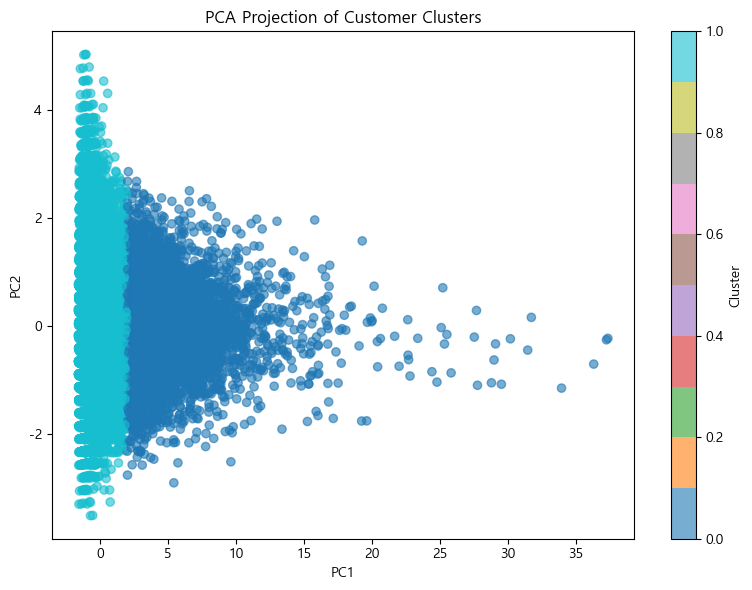

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# === (1) 고객 피처 및 군집화 파이프라인 준비 ===
# num_feats, cat_feats, cust_feat, preprocessor, pipeline 은 앞서 정의한 대로 가정

# 예: 
# num_feats = [...]
# cat_feats = ['성별']
# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), num_feats),
#     ('cat', OneHotEncoder(drop='if_binary', sparse_output=False), cat_feats)
# ])
# pipeline = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))
# cust_feat['Cluster'] = pipeline.fit_predict(cust_feat)

# === (2) 특징 행렬(X) 추출 ===
# ColumnTransformer 단계에서 변환된 특성만 뽑아냅니다.
ct = pipeline.named_steps['columntransformer']
X = ct.transform(cust_feat)

# === (3) 실루엣 스코어 계산 ===
labels = cust_feat['Cluster']
score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")

# === (4) PCA로 2차원 축소 ===
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

# === (5) PCA 산점도 시각화 ===
plt.figure(figsize=(8,6))
scatter = plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Customer Clusters')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()


In [14]:
# pipeline = make_pipeline(preprocessor, KMeans(n_clusters=2, random_state=42))
km = pipeline.named_steps['kmeans']
centroids_scaled = km.cluster_centers_

# 숫자형 피처만 원래 스케일로 되돌려 보기
num_ct = pipeline.named_steps['columntransformer'].named_transformers_['num']
centroids = num_ct.inverse_transform(centroids_scaled[:, :len(num_feats)])
centroid_df = pd.DataFrame(centroids, columns=num_feats)
print(centroid_df.round(1))


   Recency  Frequency  Monetary  OrderCount  TotalSpend  AvgShipTime    연령
0     91.6        8.8  297038.0         8.8    297038.0         89.7  32.8
1    303.2        1.8   36897.5         1.8     36897.5         89.4  32.8


|         Cluster         | 특성                                                          | 이탈 방지·관리 방안                                                                                                                                                                              |
| :---------------------: | :---------------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0. 고가치 VIP & 잠재 성장군** | • Recency ≤ 200일<br>• Frequency ≥ 5회<br>• Monetary ≥ 150 K원 | 1. **VIP 유지·강화**<br>   - 신상품 론칭 24h 얼리 액세스<br>   - 구매당 포인트 2배 적립<br>   - 전용 수량 한정 에디션 안내<br>2. **잠재 성장 프로모션**<br>   - 2주간 2회 이상 구매 시 VIP 전용 쿠폰 제공<br>   - 이메일·앱 푸시 “지금 달성하면 VIP 혜택” 리마인더 |
|    **1. 저가치·휴면 위험군**    | • Recency > 200일<br>• Frequency < 5회<br>• Monetary < 150 K원 | 1. **긴급 리인게이지**<br>   - SMS·앱 푸시 “놓치신 인기템 20% 할인”<br>   - X월 Y일까지 한정 재방문 시 적립금 5 K원 제공<br>2. **2차 구매 전환**<br>   - 첫 방문 고객 대상 “두 번째 구매 시 15% 할인” 인센티브<br>   - 무료배송·샘플 쿠폰 병행 발송            |
